## Utilizing Expert Knowledge

- Introduction to Machine Learning with Python
- page 242

In [1]:
!pip3 install mglearn

    100% |████████████████████████████████| 542kB 2.3MB/s 
    100% |████████████████████████████████| 7.8MB 673kB/s 
    100% |████████████████████████████████| 3.3MB 2.3MB/s 
    100% |████████████████████████████████| 16.7MB 865kB/s 
  Running setup.py install for imageio ... done
  Running setup.py install for mglearn ... done


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import mglearn

In [3]:
citibike = mglearn.datasets.load_citibike()

`citibike` is `pandas.Series` datatype

In [4]:
type(citibike)

pandas.core.series.Series

In [5]:
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

This object has a `plot()` member function

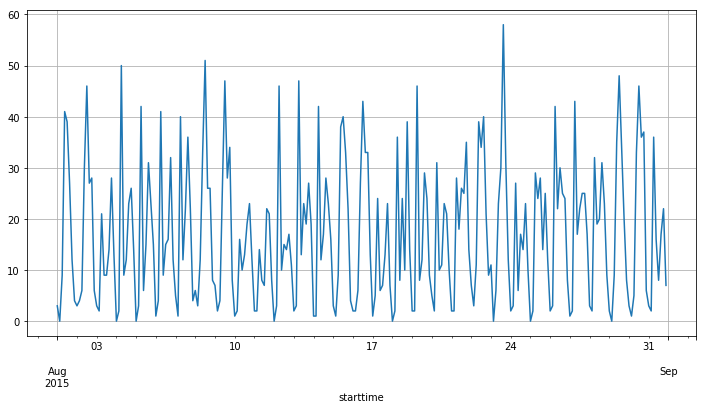

In [6]:
citibike.plot(figsize=(12,6), grid=True)

You can see how to put data/time/year in the plot index!

- check the doc. about `plt.xtics()`

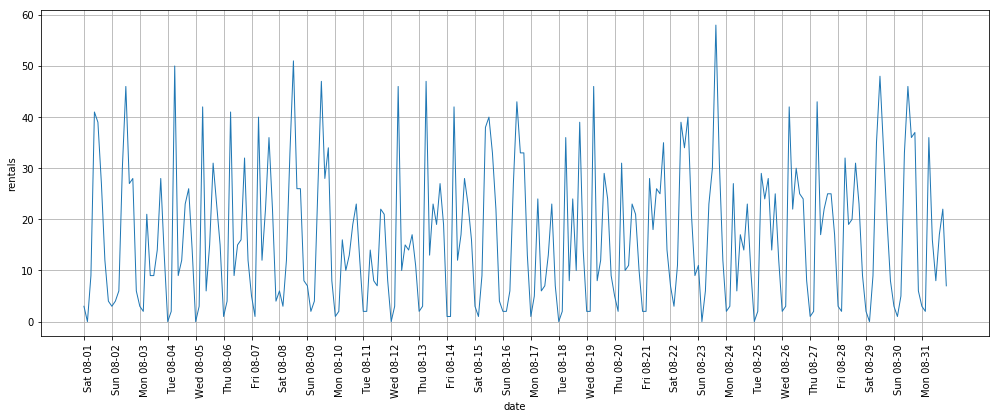

In [7]:
plt.figure (figsize=(17,6))
xtic = pd.date_range (start=citibike.index.min(), end=citibike.index.max(), freq='d')
plt.xticks (xtic, xtic.strftime('%a %m-%d'), rotation=90, ha='left')
plt.plot (citibike, linewidth=1)
plt.xlabel ('date')
plt.ylabel ('rentals')
plt.grid (True)

See what `xtic` looks like.

In [8]:
xtic

DatetimeIndex(['2015-08-01', '2015-08-02', '2015-08-03', '2015-08-04',
               '2015-08-05', '2015-08-06', '2015-08-07', '2015-08-08',
               '2015-08-09', '2015-08-10', '2015-08-11', '2015-08-12',
               '2015-08-13', '2015-08-14', '2015-08-15', '2015-08-16',
               '2015-08-17', '2015-08-18', '2015-08-19', '2015-08-20',
               '2015-08-21', '2015-08-22', '2015-08-23', '2015-08-24',
               '2015-08-25', '2015-08-26', '2015-08-27', '2015-08-28',
               '2015-08-29', '2015-08-30', '2015-08-31'],
              dtype='datetime64[ns]', freq='D')

And this too, which was used as the index in the graph.

In [9]:
xtic.strftime('%a %m-%d')

Index(['Sat 08-01', 'Sun 08-02', 'Mon 08-03', 'Tue 08-04', 'Wed 08-05',
       'Thu 08-06', 'Fri 08-07', 'Sat 08-08', 'Sun 08-09', 'Mon 08-10',
       'Tue 08-11', 'Wed 08-12', 'Thu 08-13', 'Fri 08-14', 'Sat 08-15',
       'Sun 08-16', 'Mon 08-17', 'Tue 08-18', 'Wed 08-19', 'Thu 08-20',
       'Fri 08-21', 'Sat 08-22', 'Sun 08-23', 'Mon 08-24', 'Tue 08-25',
       'Wed 08-26', 'Thu 08-27', 'Fri 08-28', 'Sat 08-29', 'Sun 08-30',
       'Mon 08-31'],
      dtype='object')

The data values can be retrieved from `pd.Series`

In [11]:
y = citibike.values
print (citibike.values, type(citibike.values), citibike.shape)

[ 3  0  9 41 39 27 12  4  3  4  6 30 46 27 28  6  3  2 21  9  9 14 28 13
  0  2 50  9 12 23 26 14  0  3 42  6 15 31 23 15  1  4 41  9 15 16 32 12
  5  1 40 12 22 36 22  4  6  3 12 33 51 26 26  8  7  2  4 26 47 28 34  8
  1  2 16 10 13 19 23 12  2  2 14  8  7 22 21  8  0  3 46 10 15 14 17 11
  2  3 47 13 23 19 27 19  1  1 42 12 17 28 23 16  3  1  9 38 40 33 22  4
  2  2  6 27 43 33 33 13  1  5 24  6  7 13 23  7  0  2 36  8 24 10 39 14
  2  2 46  8 12 29 24  9  5  2 31 10 11 23 21 10  2  2 28 18 26 25 35 14
  7  3 11 39 34 40 21  9 11  0  6 23 30 58 31 12  2  3 27  6 17 14 23 10
  0  2 29 24 28 14 25 12  2  3 42 22 30 25 24  8  1  2 43 17 22 25 25 17
  3  2 32 19 20 31 23  9  2  0  9 35 48 34 20  8  3  1  5 33 46 36 37  6
  3  2 36 16  8 17 22  7] <class 'numpy.ndarray'> (248,)


Convert the index into int numbers. Here, POSIX time is calculated from the time string.

In [12]:
X = citibike.index.strftime('%s')
print (X[:10])

Index(['1438354800', '1438365600', '1438376400', '1438387200', '1438398000',
       '1438408800', '1438419600', '1438430400', '1438441200', '1438452000'],
      dtype='object')


In [13]:
X = X.astype (int)
print (X[:10])

Int64Index([1438354800, 1438365600, 1438376400, 1438387200, 1438398000,
            1438408800, 1438419600, 1438430400, 1438441200, 1438452000],
           dtype='int64')


In [16]:
X = citibike.index.strftime('%s').astype('int').values
X.shape, type(X)

((248,), numpy.ndarray)

In [17]:
X[:10]

array([1438354800, 1438365600, 1438376400, 1438387200, 1438398000,
       1438408800, 1438419600, 1438430400, 1438441200, 1438452000])

In [19]:
prev_shape = X.shape
#
X = X.reshape(-1,1)
#
print (X[:10], type(X), X.shape, ' converted from ', prev_shape)

[[1438354800]
 [1438365600]
 [1438376400]
 [1438387200]
 [1438398000]
 [1438408800]
 [1438419600]
 [1438430400]
 [1438441200]
 [1438452000]] <class 'numpy.ndarray'> (248, 1)  converted from  (248, 1)


In [47]:
n_train = 184
xticks = xtic # defined up there
def eval_on_features(features, target, regressor, pflag=None):
        # split the given features into a training and a test set
        X_train, X_test = features[:n_train], features[n_train:]
        # also split the target array
        y_train, y_test = target[:n_train], target[n_train:] 
        regressor.fit(X_train, y_train)
        print("Test-set R^2: {:.2f}".format(regressor.score(X_test, y_test))) 
        y_pred = regressor.predict(X_test)
        y_pred_train = regressor.predict(X_train)
        plt.figure(figsize=(10, 3))
        plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
                   ha="left")
        if pflag != 'predonly':
            plt.plot(range(n_train), y_train, label="train")
            plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
        
        plt.plot(range(n_train), y_pred_train, '--', label="prediction train")
        plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
                 label="prediction test")
        
        plt.legend(loc=(1.01, 0))
        plt.xlabel("Date")
        plt.ylabel("Rentals")

Test-set R^2: -0.04


<Figure size 432x288 with 0 Axes>

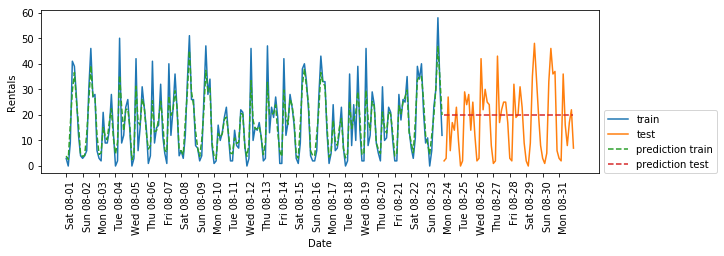

In [21]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor (n_estimators=100, random_state=0)
plt.figure()
eval_on_features (X, y, rfreg)

### Now change the domain form simple linear index to index of hours

In [22]:
X_hour = citibike.index.hour
print ('shape = ', X_hour.shape, type(X_hour))
X_hour

shape =  (248,) <class 'pandas.core.indexes.numeric.Int64Index'>


Int64Index([ 0,  3,  6,  9, 12, 15, 18, 21,  0,  3,
            ...
            18, 21,  0,  3,  6,  9, 12, 15, 18, 21],
           dtype='int64', name='starttime', length=248)

In [23]:
# what values are in X_hour
np.unique (X_hour)

array([ 0,  3,  6,  9, 12, 15, 18, 21])

In [24]:
# change the shape
X_hour = X_hour.values.reshape(-1,1)
print ('shape=', X.shape)
X_hour[:4]

shape= (248, 1)


array([[0],
       [3],
       [6],
       [9]])

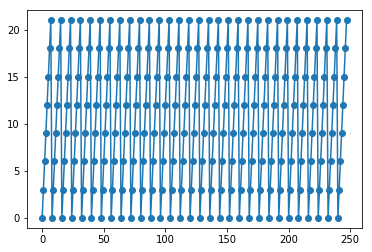

In [25]:
plt.plot (X_hour, 'o-')

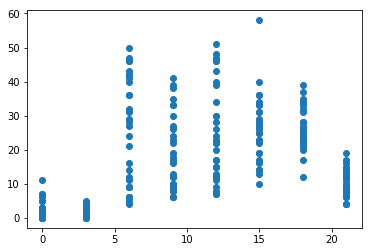

In [26]:
# plot y, the data, w.r.t this index of hours
plt.scatter (X_hour, y)

In [28]:
y[:10]

array([ 3,  0,  9, 41, 39, 27, 12,  4,  3,  4])

Test-set R^2: 0.60


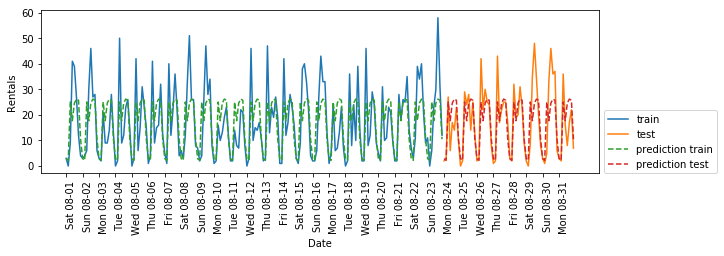

In [29]:
eval_on_features (X_hour, y, rfreg)

Random Forest Regressor just learned the average value at each of the indexes.


### Now the domain index will be 2 dimensional (day of week, hour in a day)

In [30]:
week_values = citibike.index.dayofweek.values
hour_values = citibike.index.hour.values

In [31]:
print (citibike.index.hour.values, type(citibike.index.hour.values))

[ 0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21  0  3  6  9 12 15 18 21
  0  3  6  9 12 15 18 21] <class 'numpy.ndarray'>


In [32]:
print (week_values, type(week_values))

[5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2
 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4
 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 4 4 4 4 4 4
 4 4 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0] <class 'numpy.ndarray'>


In [34]:
# change the shape
week_values = week_values.reshape(-1,1)
hour_values = hour_values.reshape(-1,1)
week_values.shape, hour_values.shape

((248, 1), (248, 1))

In [36]:
# merge the two indexes into a two dimensional index

X_hour_week = np.hstack([week_values.reshape(-1,1), hour_values.reshape(-1,1)])
print (type(X_hour_week),  X_hour_week.shape)
X_hour_week[:4]

<class 'numpy.ndarray'> (248, 2)


array([[5, 0],
       [5, 3],
       [5, 6],
       [5, 9]])

Text(0, 0.5, 'time of days')

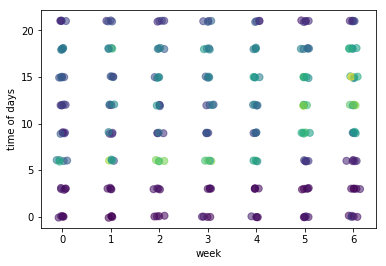

In [78]:
# Draw a scatter plot.
# The index values are shaked so that y values of the same index are visible

xx = X_hour_week + np.random.randn (*X_hour_week.shape)*0.05
plt.scatter (xx[:,0], xx[:,1], s=50, c=y, marker = 'o', alpha=0.57);
plt.xlabel ('week')
plt.ylabel('time of days')

Test-set R^2: 0.84


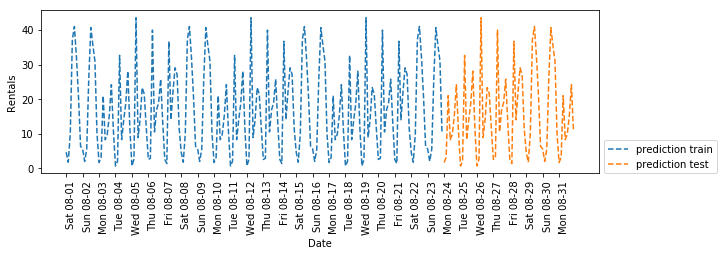

In [48]:
eval_on_features (X_hour_week, y, rfreg, pflag='predonly')

Test-set R^2: 0.84


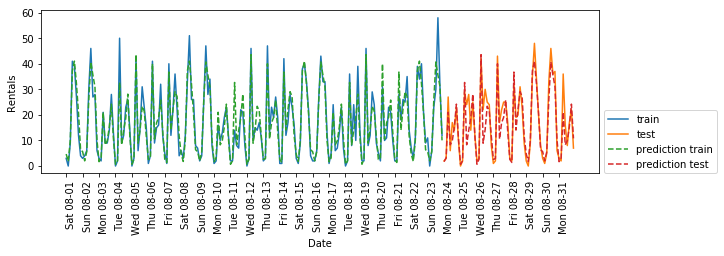

In [108]:
eval_on_features (X_hour_week, y, rfreg)

The result with random forest now repeats in a longer frequency.

Test-set R^2: 0.13


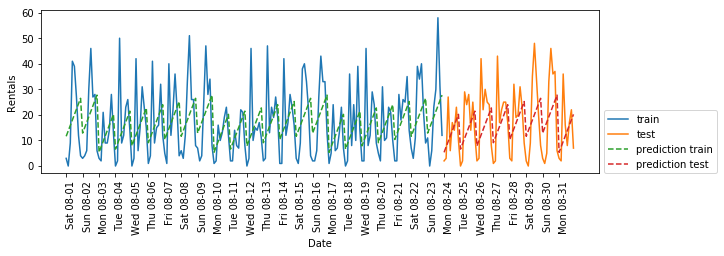

In [50]:
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")
#
from sklearn.linear_model import LinearRegression
eval_on_features (X_hour_week, y, LinearRegression() )

In [53]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(categories='auto')

In [54]:
onehot = enc.fit_transform (X_hour_week)
print (type(onehot))
onehot = onehot.toarray()
print (onehot, type(onehot), onehot.shape)

<class 'scipy.sparse.csr.csr_matrix'>
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 1.]] <class 'numpy.ndarray'> (248, 15)


In [58]:
print (X_hour_week[0], '\n', onehot[0])

[5 0] 
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


In [59]:
X_hour_week[-1], onehot[-1]

(array([ 0, 21]),
 array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]))

Above encoding is equivalent to using RF in 2D.

In [60]:
from sklearn.preprocessing import PolynomialFeatures
pt = PolynomialFeatures (degree=2, interaction_only=True, include_bias=False)
X_poly = pt.fit_transform (onehot)

In [61]:
X_poly, X_poly.shape

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.]]), (248, 120))

Why?

15 = 7+8 = one hot encoding -> polynomal = 15 + 14 + ... + 1 = 15*16 / 2 = 120

In [62]:
print (X_poly[-1])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


Q. Why do we see three 1s in the vector ?

Test-set R^2: 0.85


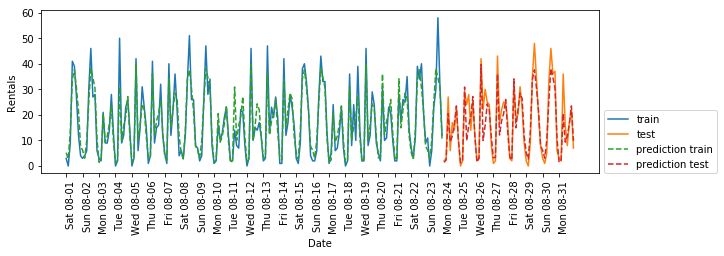

In [63]:
from sklearn.linear_model import Ridge
ridge = Ridge()
eval_on_features (X_poly, y, ridge)

Test-set R^2: 0.85


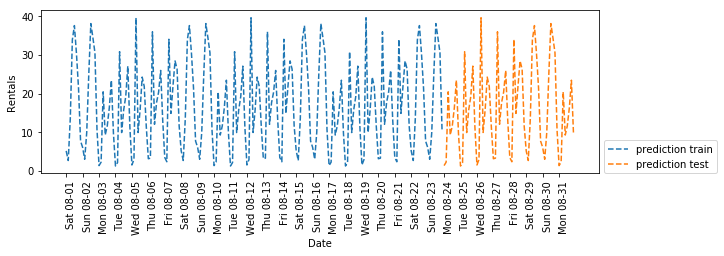

In [64]:
eval_on_features(X_poly, y, ridge, pflag='predonly')

#### Q. Can you use 56 = 7x8 dim feature vector instead of 120 polynomial?

In [66]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"] 
features = day + hour
print ('features=', features)

features= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', '00:00', '03:00', '06:00', '09:00', '12:00', '15:00', '18:00', '21:00']


In [67]:
fnames = pt.get_feature_names()
len(fnames)

120

In [72]:
fpoly = pt.get_feature_names (features)
fnz = np.array(fpoly)[ ridge.coef_ != 0]
print (len(fnz), fnz)

71 ['Mon' 'Tue' 'Wed' 'Thu' 'Fri' 'Sat' 'Sun' '00:00' '03:00' '06:00' '09:00'
 '12:00' '15:00' '18:00' '21:00' 'Mon 00:00' 'Mon 03:00' 'Mon 06:00'
 'Mon 09:00' 'Mon 12:00' 'Mon 15:00' 'Mon 18:00' 'Mon 21:00' 'Tue 00:00'
 'Tue 03:00' 'Tue 06:00' 'Tue 09:00' 'Tue 12:00' 'Tue 15:00' 'Tue 18:00'
 'Tue 21:00' 'Wed 00:00' 'Wed 03:00' 'Wed 06:00' 'Wed 09:00' 'Wed 12:00'
 'Wed 15:00' 'Wed 18:00' 'Wed 21:00' 'Thu 00:00' 'Thu 03:00' 'Thu 06:00'
 'Thu 09:00' 'Thu 12:00' 'Thu 15:00' 'Thu 18:00' 'Thu 21:00' 'Fri 00:00'
 'Fri 03:00' 'Fri 06:00' 'Fri 09:00' 'Fri 12:00' 'Fri 15:00' 'Fri 18:00'
 'Fri 21:00' 'Sat 00:00' 'Sat 03:00' 'Sat 06:00' 'Sat 09:00' 'Sat 12:00'
 'Sat 15:00' 'Sat 18:00' 'Sat 21:00' 'Sun 00:00' 'Sun 03:00' 'Sun 06:00'
 'Sun 09:00' 'Sun 12:00' 'Sun 15:00' 'Sun 18:00' 'Sun 21:00']


In [73]:
# features that have zero coefficients.
fzero = np.array(fpoly)[ ridge.coef_ == 0]
fzero

array(['Mon Tue', 'Mon Wed', 'Mon Thu', 'Mon Fri', 'Mon Sat', 'Mon Sun',
       'Tue Wed', 'Tue Thu', 'Tue Fri', 'Tue Sat', 'Tue Sun', 'Wed Thu',
       'Wed Fri', 'Wed Sat', 'Wed Sun', 'Thu Fri', 'Thu Sat', 'Thu Sun',
       'Fri Sat', 'Fri Sun', 'Sat Sun', '00:00 03:00', '00:00 06:00',
       '00:00 09:00', '00:00 12:00', '00:00 15:00', '00:00 18:00',
       '00:00 21:00', '03:00 06:00', '03:00 09:00', '03:00 12:00',
       '03:00 15:00', '03:00 18:00', '03:00 21:00', '06:00 09:00',
       '06:00 12:00', '06:00 15:00', '06:00 18:00', '06:00 21:00',
       '09:00 12:00', '09:00 15:00', '09:00 18:00', '09:00 21:00',
       '12:00 15:00', '12:00 18:00', '12:00 21:00', '15:00 18:00',
       '15:00 21:00', '18:00 21:00'], dtype='<U11')

In [74]:
cnz = ridge.coef_[ ridge.coef_ != 0]
print ('@@ {} non-zero features out of {} features'.format(len(cnz), len(ridge.coef_)))

@@ 71 non-zero features out of 120 features


Text(0, 0.5, 'feature')

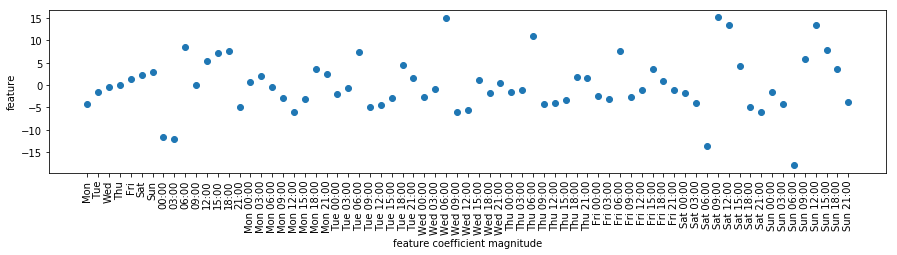

In [75]:
plt.figure (figsize=(15,3))
plt.plot (cnz, 'o')
plt.xticks (np.arange(len(cnz)), fnz, rotation=90)
plt.xlabel ('feature coefficient magnitude')
plt.ylabel ('feature')